In [9]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# READING THE REQUIRED FILES
import os
path = 'D:\Dataset\ML_Artivatic_dataset\ML_Artivatic_dataset'
os.chdir(path)
train = pd.read_csv('train_indessa.csv')
test = pd.read_csv('test_indessa.csv')

## INDEX

### <a href='#1'>1. BUSINESS PROBLEM</a>
### <a href='#2'>2. EDA </a>
    
   * ## <a href='#2.1'>2.1 TARGET DISTRIBUTION</a>

   * ## <a href='#2.2'>2.2 MISSING VALUES</a>

   * ## <a href='#2.3'> 2.3 CATEGORICAL FEATURE ANALYSIS</a>

   * ## <a href='#2.4'>2.4 NUMERICAL FEATURES ANALYSIS</a>

<a id='1'></a>

## 1. BUSINESS PROBLEM

The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets)
have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock
has fallen by 20% in the previous quarter alone.
After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With
the messy data collected over all the years, this bank has decided to use machine learning to figure
out a way to find these defaulters and devise a plan to reduce them.
This bank uses a pool of investors to sanction their loans. For example: If any customer has applied
for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan
application

<a id='2'></a>

## 2. EDA


<a id='2.1'></a>

### 2.1  TARGET DISTRIBUTION

In [5]:
print("Total Data Points are : {} with total defaults as : {}".format(train.shape[0],train[train['loan_status']==1].shape[0]))

Total Data Points are : 532428 with total defaults as : 125827


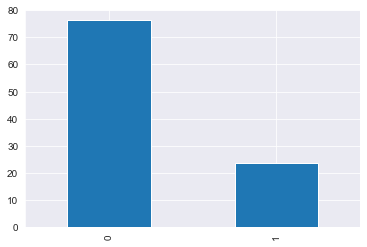

In [6]:
(train['loan_status'].value_counts()/train.shape[0]*100).plot(kind='bar')

23% of the overall population in train set belongs to class 1 i.e defaulters

<a id='2.2'></a>

### 2.2  MISSING VALUES

In [7]:
def get_na_values(df):
    '''This function returns %age of missing values for each feature for the dataframe passed'''
    total_datapoints = df.shape[0] 
    temp = pd.DataFrame(np.round(df.isnull().sum()/total_datapoints*100,2),columns=['PercentMissingValues'])
    temp.sort_values(ascending=False,by=['PercentMissingValues'],inplace=True)
    return temp

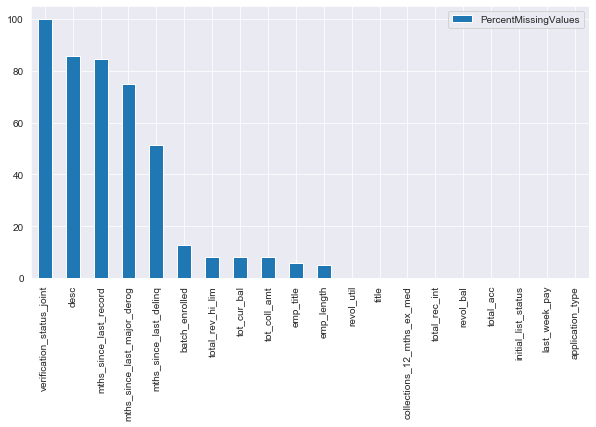

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
test_na = get_na_values(test)
test_na.head(20).plot(kind='bar',ax=ax)


### Observations : 

Following features have more 70% values as null/missing hence as a might starting we might want to exclude these features without losing any significant information

* verification_status_joint : This is indicates for people who have taken loan jointly, their co applicant has been verified or not ( since 99.94% loan applicants had applied individually hence this field is null for most of the cases )
<br><br>
* desc : Description of purpose of loan provided by the loan applicant (probably this is an optional field during loan application filling since there is an already purpose field hence customer might select the purpose and skip the description part)
<br><br>
* mths_since_last_record : no. of months since last public record, not sure exactly what this field signifies probably publicly available record of his last loan.

<a id='2.3'></a>

### 2.3 CATEGORICAL FEATURES ANALYSIS

We Will first look at the categorical features, here we will look at the performance of customers in different categories to uderstand the feature importances

In [12]:
# extracting categorical columns
total_cat_cols = list(train.select_dtypes(['object']).columns)
for c in total_cat_cols: 
    print(c)

term
batch_enrolled
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
pymnt_plan
desc
purpose
title
zip_code
addr_state
initial_list_status
application_type
verification_status_joint
last_week_pay


In [13]:
# SOME UTILITY FUNCTIONS FOR PLOTTING GRAPHS

def plot_graphs(summarizer,bucket):
    '''summarizes the mentioned categorical feature w.r.t target variable and returns a datafrmae'''
    #summarizer[bucket] = summarizer[bucket].fillna("Null Values")
    buck = summarizer.groupby(bucket).count()['member_id'].keys()
    size = summarizer.groupby(bucket).count()['member_id'].values
    size = np.round(size/summarizer.shape[0]*100,1)
    labels = buck.astype(str) +'  {'+ size.astype(str)+'%}'
    lst = labels.tolist()
    ####################################################################################
    df = summarizer.groupby('loan_status')[bucket].value_counts().unstack(0).fillna(0)
    df['sum']  = df[0]+df[1]
    df[0] = df[0]/df['sum']*100
    df[1] = df[1]/df['sum']*100
    df.drop(columns=['sum'],inplace=True)
    return df,lst


def get_cat_feat_plots(cat_cols,main_df=train,x_len = 20,y_len=5):
    '''this function returns plots for the list of categorical features passed'''
    tot_cols = len(cat_cols)
    df = []
    ls = []
    for x in cat_cols:
        a,b = plot_graphs(main_df.copy(deep=True),x)
        df.append(a)
        ls.append(b)
    fig,axs = plt.subplots(1,tot_cols,figsize=(x_len,y_len))
    if tot_cols>1:
        for i in range(0,tot_cols):
            df[i].plot(ax=axs[i],kind='bar')
            for p in axs[i].patches:
                width, height = p.get_width(), p.get_height()
                axs[i].annotate(round(height,ndigits=2), (p.get_x(),height+0.4))
                axs[i].set_xticklabels(ls[i])
        plt.show()
    else:
        for i in range(0,tot_cols):
            df[i].plot(ax=axs,kind='bar')
            for p in axs.patches:
                width, height = p.get_width(), p.get_height()
                axs.annotate(round(height,ndigits=2), (p.get_x(),height+0.4))
                axs.set_xticklabels(ls[i])
        plt.show()
    
    
def get_num_feat_plots(cols,df=train,x_len=18,y_len=5):
    '''this function returns plots for list of numerical features passed'''
    tot_cols = len(cols)
    fig,axs = plt.subplots(1,tot_cols,figsize=(x_len,y_len))
    for i,col in enumerate(cols):
        if tot_cols>1:
            sns.kdeplot(df[df['loan_status']==1][col],label="Class 1",shade=True,ax=axs[i])
            sns.kdeplot(df[df['loan_status']==0][col],label="Class 0",shade=True,ax=axs[i])
            axs[i].set_xlabel(col,fontsize=12)
        elif tot_cols==1:
            sns.kdeplot(df[df['loan_status']==1][col],label="Class 1",shade=True,ax=axs)
            sns.kdeplot(df[df['loan_status']==0][col],label="Class 0",shade=True,ax=axs)
            plt.xlabel(col,fontsize=12)
    plt.show()     
    

 __NOTE__ :  _IN THE CATEGORICAL FEATURE PLOTS ORANGE BAR REPRESENTS DEFAULTERS AND BLUE BAR REPRESENT NON DEFAULTERS NUMBER ABOVE THE BAR REPRESENTS %AGE OF DEFAULTERS/NON DEFAULTERS IN THE PARTICULAR BUCKET AND NUMBER IN {} REPRESENTS %AGE OF PEOPLE IN THAT PARTICULAR CATEGORY_

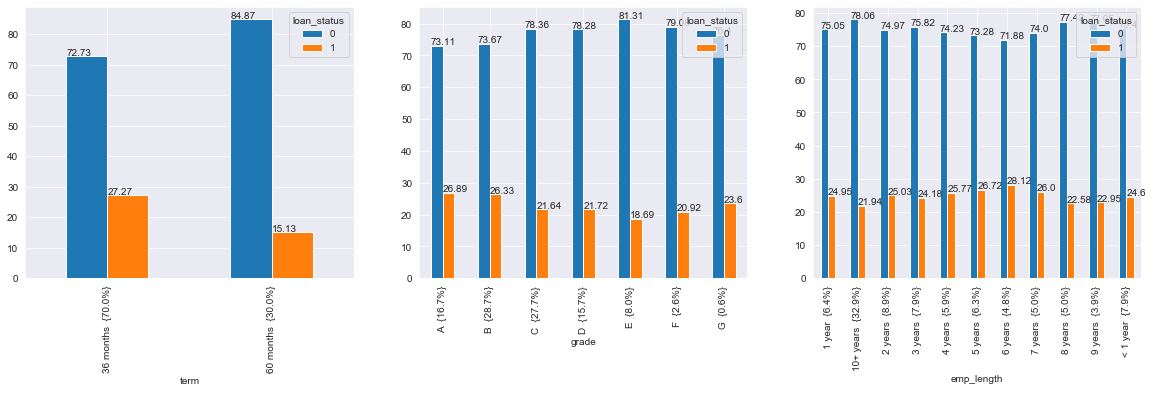

In [16]:
get_cat_feat_plots(['term','grade','emp_length'])

### Observations

1) There is clear trend in term here people opting for longer loan tenure tend to perform better as short term loans, probably these are people who are given a higher limit, and usually lenders give a high credit limit to people who have shown a good repayment history in the past

2) grade is some internal grade assigned by the bank, we can see that grade E people particularly have better performance as compared to others, also there is somewhat a decreasing trend going from A to G probably inital grades(A-C) are more risky people

3) emp_length : This shows the time period for which the customer has been employed, there are no significant patterns, it kingd of looks flat for all tenures

In [17]:
# Here we can see as well loan_amnt for longer tenure people is higher
train[['term','loan_amnt','annual_inc']].groupby(['term']).mean()

,loan_amnt,annual_inc
term,,
36 months,12484.126378,72523.414525
60 months,20066.791430,80883.018213


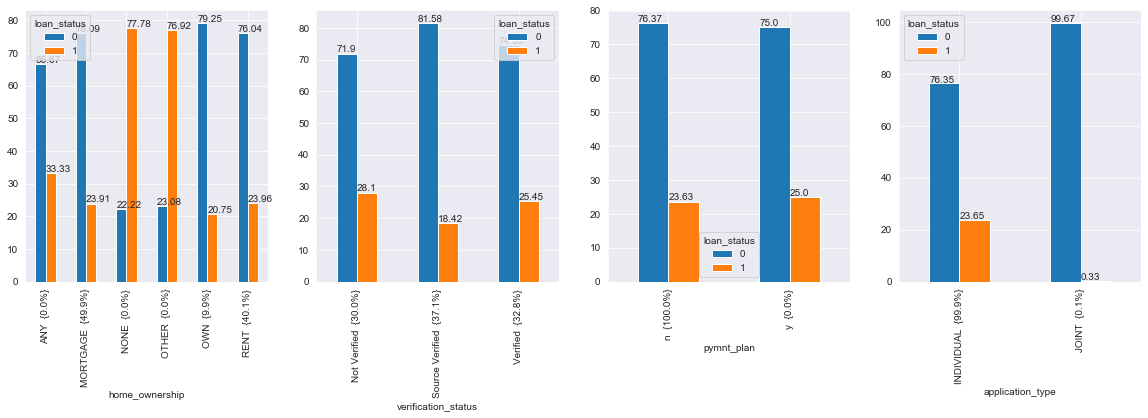

In [18]:
get_cat_feat_plots(['home_ownership','verification_status','pymnt_plan','application_type'])

### Observations

1) features application_type(if the applicant is an individual or applied jointly) and pymnt_plan had a highly skewed distribution >99% of values belong to one category hence we might want to drop these features in our initial modelling phase

2) While home ownership might look a bit intimidating with those big orange towers in NONE,ANY and OTHER categories, but these categories combined contribute to ~0.3% percent to of total population i.e most of the people either live in MORTGAGE,RENT or have have their own property

3) verification_status refers to if the income of the applicant is verifed by the bank, and this shows some clear trend for people for whom income is verified have a lesser default rate sense which kind of makes sense as well, since these are verified customers hence there are less chances of fraud. 

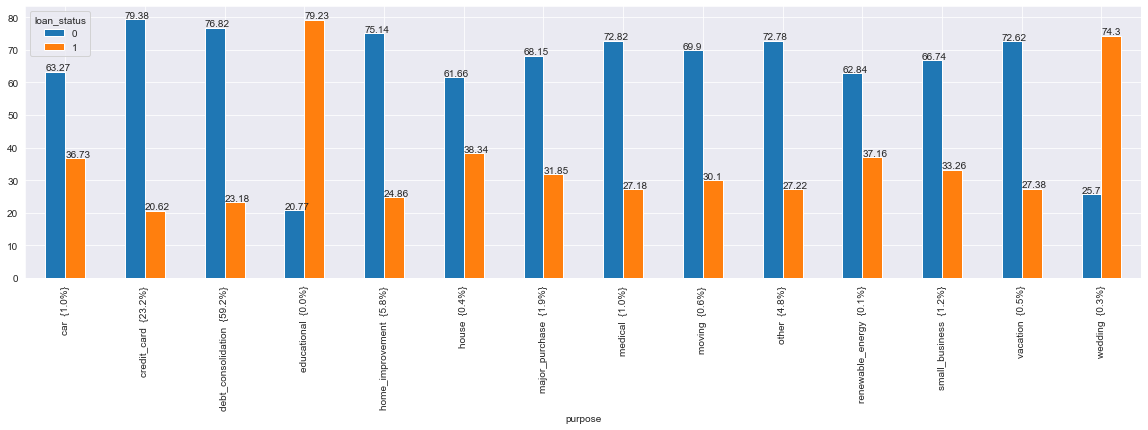

In [21]:
get_cat_feat_plots(['purpose'])

### Observations:

1) This field refers to loan purpose selected by customers, ~83% customers were taking loans to pay out their other liablities like other loans/credit cards, interesting to see event thouhh small numbers but people selecting wedding,renewable_energy,small_business,house had a very high default rate, probably we could club these higlhy risky loan purposes into a single category during our feature engineering

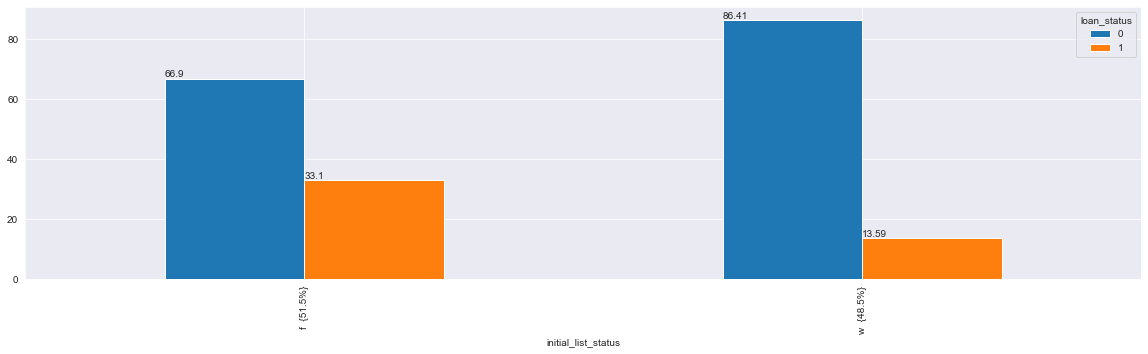

In [22]:
get_cat_feat_plots(['initial_list_status'])

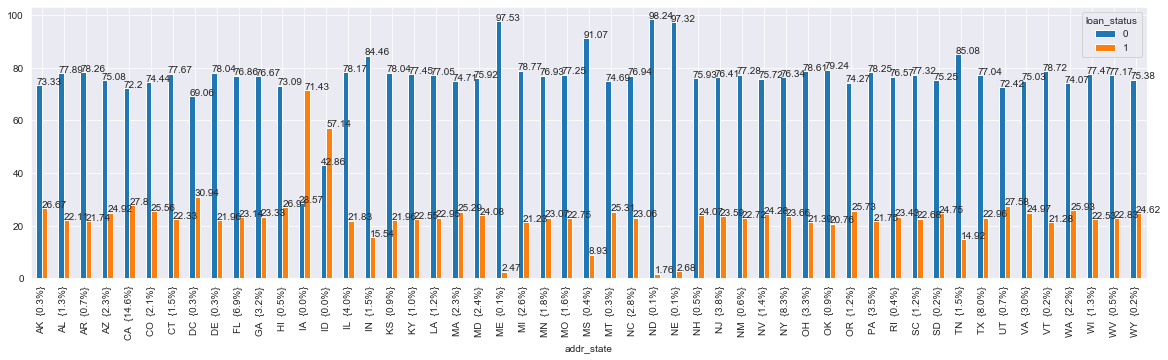

In [24]:
get_cat_feat_plots(['addr_state'])

### Observations

1) initial_list_status refers to if loan application is forwarded or given a waiting status which would probably be given for some pending documents, interestingly waitlisted candidates have a much better performance and the population size is also significant 

2) Loan Applications have a pretty uniform distribution across states,California, New York, Florida and Texas had more applications as compared to others which isn't as these four states have the highest population (>19 Million) in US hence these would tend to have more applications, performances are mostly flat across all states except for few outliers but the ratio of applications from there is very small.


<a id='2.4'></a>
### 2.4 NUMERICAL FEATURE ANALYSIS

In [43]:
train.drop_duplicates(subset=['member_id']).shape

(532428, 45)

In [112]:
num_cols = list(train.select_dtypes(['float64','int64']).columns)
for c in num_cols: 
    print(c)

member_id
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
annual_inc
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
collections_12_mths_ex_med
mths_since_last_major_derog
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim
loan_status


First let us look if their any correlartions present in any features

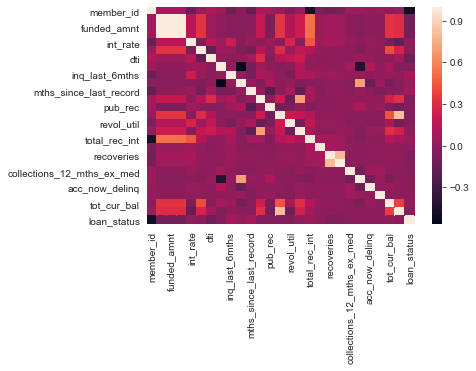

In [104]:
sns.heatmap(corr_matrix)

### Observations :

loan_amnt, funded_amnt and funded_amnt_inv are highly correlated they have a correlation >0.99, we should take single variable only to avoid multicollinearity
    

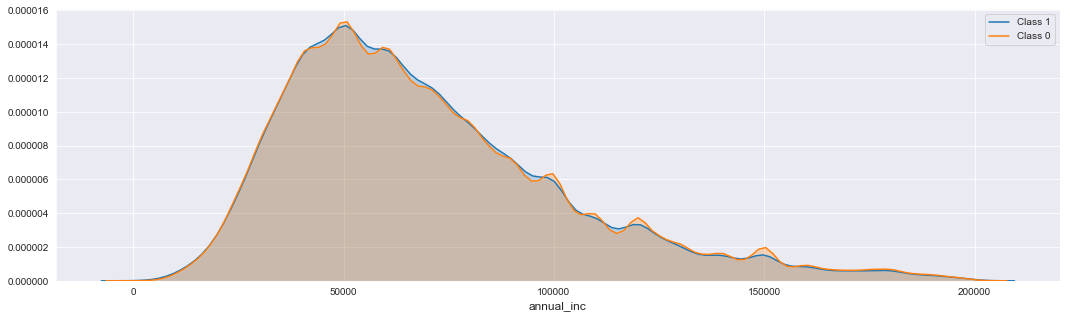

In [20]:
get_num_feat_plots(['annual_inc'],df = train[train['annual_inc']<200000])

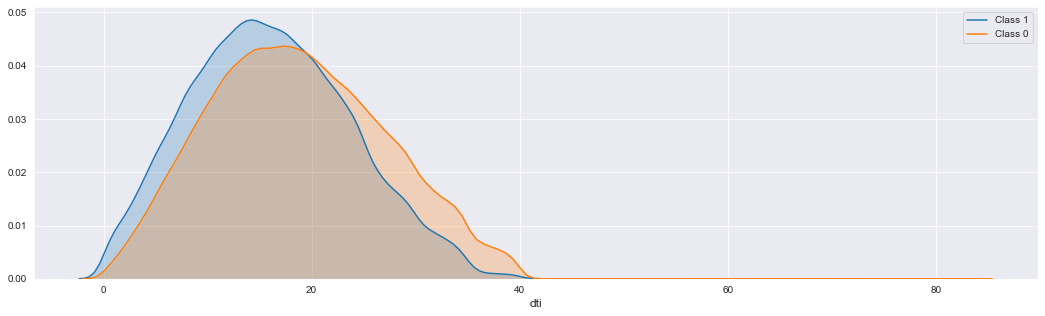

In [21]:
get_num_feat_plots(['dti'],df = train[train['dti']<=100])

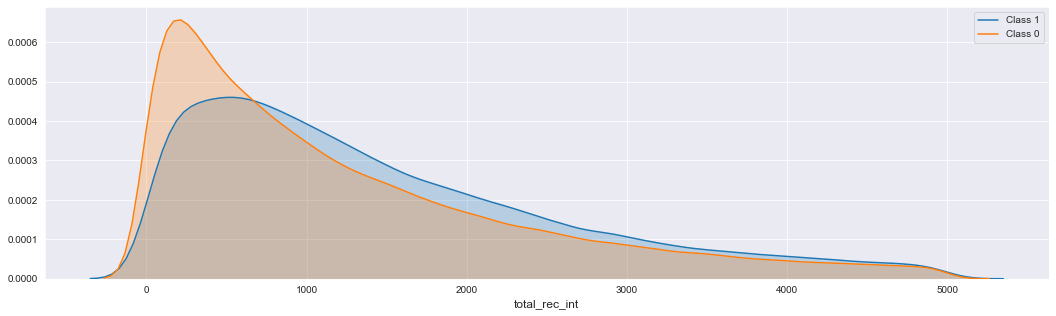

In [57]:
get_num_feat_plots(['total_rec_int'],df = train[train['total_rec_int']<=5000])

## Observations

1) After removing the outliers dti (loan applicant's existing monthly income debts w.r.t income) shows some trend, defaulters had a lower dti ratio as compared to good borrowers, this might be because 

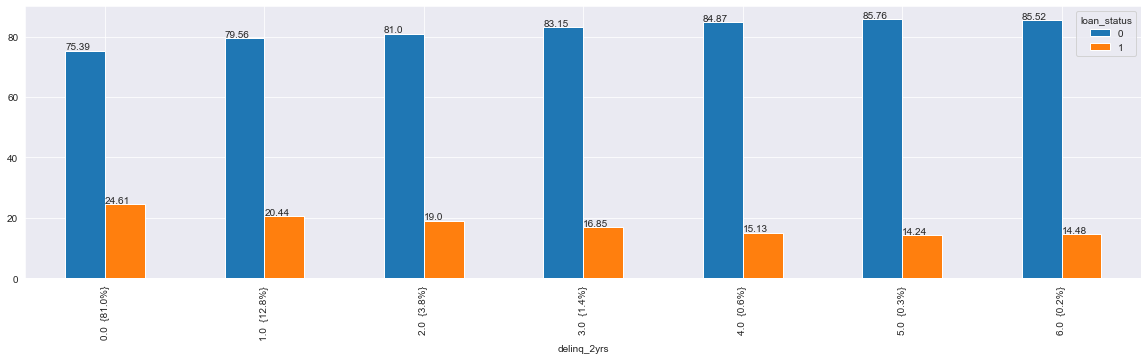

In [40]:
get_cat_feat_plots(['delinq_2yrs'],train[train['delinq_2yrs']<=6])

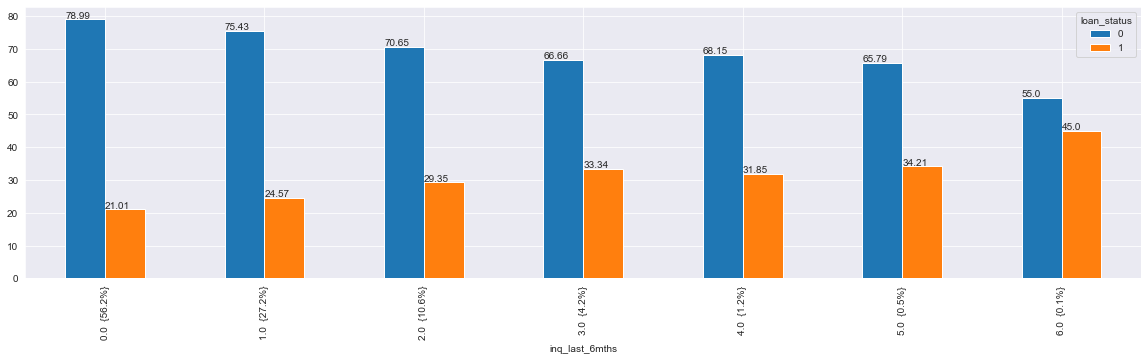

In [41]:
get_cat_feat_plots(['inq_last_6mths'],train[train['inq_last_6mths']<=6])

### Observations

1) These two features shows one of the cleanest trend, high number of recent enquiries and delinquincies(30+ DPD in past 2 years) are clear signs of default behavioir 